In [1]:
import numpy as np
import pandas as pd
from IPython.display import clear_output
import matplotlib.pyplot as plt
from allison.nn.layers import LayerDense
from allison.nn.models import NeuralNetwork
from allison.utils.functions.data import train_test_split
from allison.utils.functions.loss import categorical_cross_entropy,binary_cross_entropy
from allison.utils.functions.activation import sigmoid,softmax
from allison.utils.metrics import accuracy
from allison.utils.functions.transforms import get_numeric_labels

Dataset

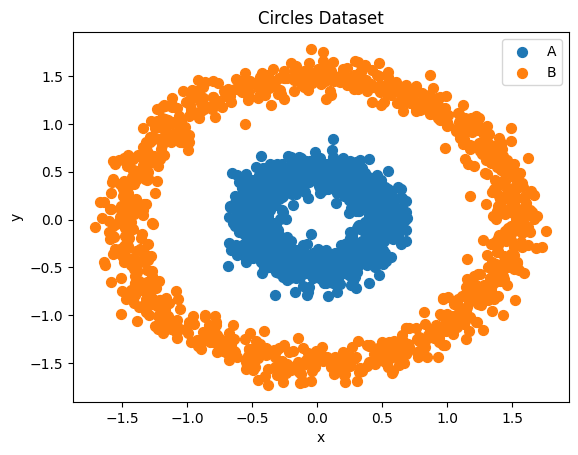

In [2]:
n_points = 1000

r1=0.5
r2=1.5

thetas = np.linspace(0,2*np.pi,n_points)

x1=r1*np.cos(thetas) + 0.1*np.random.randn(n_points)
y1=r1*np.sin(thetas) + 0.1*np.random.randn(n_points)

x2=r2*np.cos(thetas) + 0.1*np.random.randn(n_points)
y2=r2*np.sin(thetas) + 0.1*np.random.randn(n_points)

# x3=4+r1*np.cos(thetas) + 0.1*np.random.randn(n_points)
# y3=4+r1*np.sin(thetas) + 0.1*np.random.randn(n_points)


plt.scatter(x1,y1,s=50,label="A")
plt.scatter(x2,y2,s=50,label="B")
# plt.scatter(x3,y3,s=50,label="C")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Circles Dataset")
plt.legend()

In [3]:
x=x1.tolist() + x2.tolist()# + x3.tolist()
y=y1.tolist() + y2.tolist()# + y3.tolist() 
tags = ["A" for x in x1.tolist()] + ["B" for x in x2.tolist()]# + ["C" for x in x3.tolist()]
df=pd.DataFrame({
    "x":x,
    "y":y,
    "tags":tags
})
df.head()

,x,y,tags
0,0.447712,0.026705,A
1,0.470991,0.025605,A
2,0.392403,-0.008052,A
3,0.608006,-0.001531,A
4,0.511915,-0.145427,A


Split data for train and test

In [4]:
data_train, data_test = train_test_split(df,0.8)

Selecting features and labels

In [5]:
features = ["x", "y"]
labels = ["tags"]

In [6]:
def get_binary_labels(labels):

    new_labels = []

    for x in labels:
        if x=="A":
            new_labels.append(1)
        else:
            new_labels.append(0)

    return np.array(new_labels)

Train data

In [7]:
features_train = data_train[features].to_numpy()
labels_train=data_train[labels].to_numpy()
print(features_train.shape,labels_train.shape)
labels_train = get_binary_labels(labels_train)
labels_train

(1573, 2) (1573, 1)


array([1, 1, 1, ..., 0, 0, 0])

Test data

In [8]:
features_test = data_test[features].to_numpy()
labels_test = data_test[labels].to_numpy()
print(features_test.shape,labels_test.shape)
labels_test = get_binary_labels(labels_test)
labels_test

(427, 2) (427, 1)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Build a Neural Network

In [9]:
model = NeuralNetwork(binary_cross_entropy,accuracy, 0.00001)
model.add_layer(LayerDense(2,4,sigmoid))
model.add_layer(LayerDense(4,1,sigmoid))
model.summary()

Layer:1, neurons:4, input:(n,2), weights:(2,4), output:(n,4), activation:sigmoid 

Layer:2, neurons:1, input:(n,4), weights:(4,1), output:(n,1), activation:sigmoid 

Total -> Layers:2, neurons:5, weights:12, bias:5 params:17 

Loss function: binary_cross_entropy 

Metric: accuracy 

Learning Rate: 1e-05 



In [10]:
activation = model.foward(features_train)
print(np.min(activation),np.max(activation))
model.bacward(activation,labels_train,features_train)

loss = model.loss_function(labels_train,activation,True)
print(loss)
acc = model.metric(activation,labels_train)
print(acc)

0.9161676653521432 0.9999943092485731
27080387427.427063
100.0


Training

In [11]:
steps = 200
iters = 10

iters_list=[]
evals_train=[]
evals_test=[]

accuracy_train = 0
accuracy_test = 0

for step in range(1,steps+1):
    if accuracy_train > 98.0 and accuracy_test > 98.0:
        break
    model.train(features_train,labels_train,iters,False)
    accuracy_train = model.evaluate(features_train,labels_train)
    accuracy_test = model.evaluate(features_test,labels_test)

    iters_list.append(step*iters)
    evals_train.append(accuracy_train)
    evals_test.append(accuracy_test)

    predictions = model.predict(features_train)
    predictions = get_numeric_labels(predictions)

    fig,(fig1,fig2) = plt.subplots(1,2,figsize=(16,6))
    fig1.plot(iters_list,evals_train,label=f"Train Dataset:{evals_train[-1]:.2f}%")
    fig1.plot(iters_list,evals_test,label=f"Test Dataset:{evals_test[-1]:.2f}%")
    fig1.set_title("Training")
    fig1.set_xlabel("Iter")
    fig1.set_ylabel("Accuracy")
    fig1.legend(loc="upper left")
    fig2.scatter(features_train[:,0],features_train[:,1], c = predictions)
    fig2.set_title("Circles Dataset")
    fig2.set_xlabel("X")
    fig2.set_ylabel("Y")
    plt.show()
    clear_output(wait=True)

/home/mitchellmirano/Desktop/Mitchell-Projects/Allison/allison/utils/functions/activation.py:5: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-sumatory))
/home/mitchellmirano/Desktop/Mitchell-Projects/Allison/allison/utils/functions/loss.py:16: RuntimeWarning: divide by zero encountered in divide
  dbce=-np.sum(labels/predictions + (labels-1)/(1-predictions))
/home/mitchellmirano/Desktop/Mitchell-Projects/Allison/allison/utils/functions/loss.py:16: RuntimeWarning: invalid value encountered in divide
  dbce=-np.sum(labels/predictions + (labels-1)/(1-predictions))
/home/mitchellmirano/Desktop/Mitchell-Projects/Allison/allison/utils/functions/activation.py:7: RuntimeWarning: overflow encountered in exp
  return np.exp(-sumatory)/((1+ np.exp(-sumatory)))**2
/home/mitchellmirano/Desktop/Mitchell-Projects/Allison/allison/utils/functions/activation.py:7: RuntimeWarning: invalid value encountered in divide
  return np.exp(-sumatory)/((1+ np.exp(-sumatory)))**2


IndexError: index 0 is out of bounds for axis 0 with size 0